# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
import catboost as cbc
from sklearn.model_selection import GridSearchCV

# Reading Data

In [2]:
df = pd.read_csv("Train_Data.csv")
test = pd.read_csv("Test_Data.csv")

# Data Exploration

In [3]:
df.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [4]:
df.shape

(25920, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        25920 non-null  int64  
 1   Specific ailments          25920 non-null  int64  
 2   ID2                        25920 non-null  int64  
 3   Food preference            25910 non-null  object 
 4   Age                        25920 non-null  int64  
 5   BMI                        25920 non-null  float64
 6   Smoker?                    25920 non-null  object 
 7   Living in?                 25920 non-null  object 
 8   Any heriditary condition?  25920 non-null  object 
 9   Follow Diet                24947 non-null  float64
 10  Physical activity          24947 non-null  float64
 11  Regular sleeping hours     24947 non-null  float64
 12  Alcohol consumption        24947 non-null  float64
 13  Social interaction         24947 non-null  flo

In [6]:
df.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference               10
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  973
Physical activity            973
Regular sleeping hours       973
Alcohol consumption          973
Social interaction           973
Taking supplements           973
Mental health management     973
Illness count last year      973
Healthy                        0
dtype: int64

In [7]:
df.nunique()

ID1                          25920
Specific ailments               53
ID2                          10941
Food preference                 32
Age                             76
BMI                          10941
Smoker?                          3
Living in?                       2
Any heriditary condition?        1
Follow Diet                      2
Physical activity                2
Regular sleeping hours           2
Alcohol consumption              2
Social interaction               2
Taking supplements               2
Mental health management         2
Illness count last year          5
Healthy                          2
dtype: int64

# Data Preprocessing

In [9]:
# dropping duplicates

# df.drop_duplicates(inplace=True)

In [10]:
df.shape

(25920, 15)

In [11]:
def get_food_preferences(row):
    food_preference = str(row['Food preference'])  # Convert to string to handle NaN values
    dx_1 = 1 if 'DX1' in food_preference else 0
    dx_2 = 1 if 'DX2' in food_preference else 0
    dx_3 = 1 if 'DX3' in food_preference else 0
    dx_4 = 1 if 'DX4' in food_preference else 0
    dx_5 = 1 if 'DX5' in food_preference else 0
    dx_6 = 1 if 'DX6' in food_preference else 0
    return pd.Series([dx_1, dx_2, dx_3, dx_4, dx_5, dx_6])

df[['DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6']] = df.apply(get_food_preferences, axis=1)
df.drop(['Food preference'], axis=1, inplace=True)

df.head()

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6
0,44,49,20.500470,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1
1,39,20,26.076580,NO,URBAN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,1,0,0
2,29,1,21.420866,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
3,27,30,25.203247,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0
4,9,40,19.355846,YES,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1


In [12]:
test[['DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6']] = test.apply(get_food_preferences, axis=1)
test.drop(['Food preference'], axis=1, inplace=True)

test.head()

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,DX1,DX2,DX3,DX4,DX5,DX6
0,2,38,18.879331,YES,URBAN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
1,5,46,21.231991,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0
2,37,11,17.867876,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0
3,44,10,26.886096,NO,RURAL,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,0,0,1,0
4,37,3,23.362746,NO,RURAL,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,1,1,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Specific ailments         25920 non-null  int64  
 1   Age                       25920 non-null  int64  
 2   BMI                       25920 non-null  float64
 3   Smoker?                   25920 non-null  object 
 4   Living in?                25920 non-null  object 
 5   Follow Diet               24947 non-null  float64
 6   Physical activity         24947 non-null  float64
 7   Regular sleeping hours    24947 non-null  float64
 8   Alcohol consumption       24947 non-null  float64
 9   Social interaction        24947 non-null  float64
 10  Taking supplements        24947 non-null  float64
 11  Mental health management  24947 non-null  float64
 12  Illness count last year   24947 non-null  float64
 13  Healthy                   25920 non-null  int64  
 14  DX1   

In [14]:
df.isnull().sum()

Specific ailments             0
Age                           0
BMI                           0
Smoker?                       0
Living in?                    0
Follow Diet                 973
Physical activity           973
Regular sleeping hours      973
Alcohol consumption         973
Social interaction          973
Taking supplements          973
Mental health management    973
Illness count last year     973
Healthy                       0
DX1                           0
DX2                           0
DX3                           0
DX4                           0
DX5                           0
DX6                           0
dtype: int64

In [15]:
#modifying the categorical columns by encoding them
df.loc[df['Smoker?'] == "NO", 'Smoker?'] = 0
df.loc[df['Smoker?'] == "YES", 'Smoker?'] = 1
df.loc[df['Smoker?'] == "Cannot say", 'Smoker?'] = 2
df['Smoker?']=df['Smoker?'].astype(int)

test.loc[test['Smoker?'] == "NO", 'Smoker?'] = 0
test.loc[test['Smoker?'] == "YES", 'Smoker?'] = 1
test.loc[test['Smoker?'] == "Cannot say", 'Smoker?'] = 2
test['Smoker?']=test['Smoker?'].astype(int)

df.loc[df['Living in?'] == "RURAL", 'Living in?'] = 1
df.loc[df['Living in?'] == "URBAN", 'Living in?'] = 0
df['Living in?']=df['Living in?'].astype(int)


test.loc[test['Living in?'] == "RURAL", 'Living in?'] = 1
test.loc[test['Living in?'] == "URBAN", 'Living in?'] = 0
test['Living in?']=test['Living in?'].astype(int)

In [16]:
df.head()

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6
0,44,49,20.500470,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1
1,39,20,26.076580,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,1,0,0
2,29,1,21.420866,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
3,27,30,25.203247,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0
4,9,40,19.355846,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Specific ailments         25920 non-null  int64  
 1   Age                       25920 non-null  int64  
 2   BMI                       25920 non-null  float64
 3   Smoker?                   25920 non-null  int32  
 4   Living in?                25920 non-null  int32  
 5   Follow Diet               24947 non-null  float64
 6   Physical activity         24947 non-null  float64
 7   Regular sleeping hours    24947 non-null  float64
 8   Alcohol consumption       24947 non-null  float64
 9   Social interaction        24947 non-null  float64
 10  Taking supplements        24947 non-null  float64
 11  Mental health management  24947 non-null  float64
 12  Illness count last year   24947 non-null  float64
 13  Healthy                   25920 non-null  int64  
 14  DX1   

In [18]:
#imputing missing values by applying knn imputer

from sklearn.impute import KNNImputer
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
imputer = KNNImputer(n_neighbors=2)
df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])

In [19]:
df.isnull().sum()

Specific ailments           0
Age                         0
BMI                         0
Smoker?                     0
Living in?                  0
Follow Diet                 0
Physical activity           0
Regular sleeping hours      0
Alcohol consumption         0
Social interaction          0
Taking supplements          0
Mental health management    0
Illness count last year     0
Healthy                     0
DX1                         0
DX2                         0
DX3                         0
DX4                         0
DX5                         0
DX6                         0
dtype: int64

<AxesSubplot: >

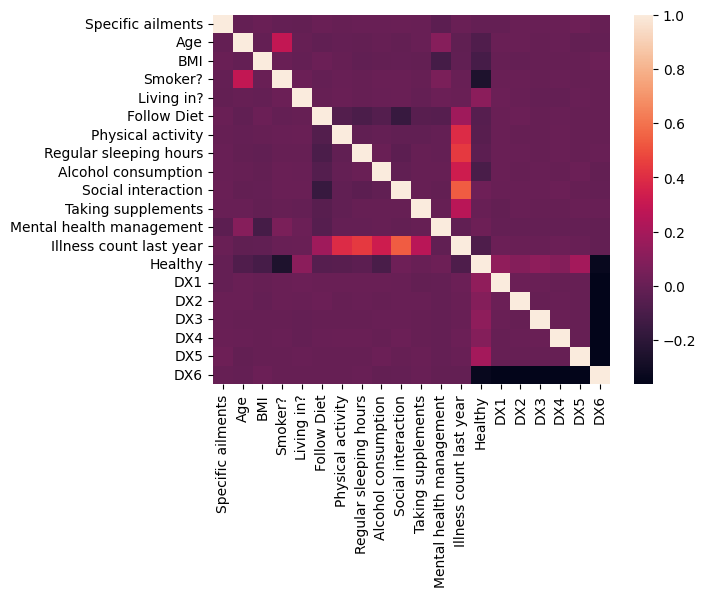

In [20]:
import seaborn as sns
data=df.corr()
sns.heatmap(data=data)

In [21]:
# Scaling the df

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[[ "Age", "BMI","Specific ailments"]])
scaled_data = pd.DataFrame(scaled_data, index = df.index, columns= ["Age scaled", "BMI scaled","Specific ailments scaled"])
df = df.join(scaled_data)
df.drop(["Age", "BMI","Specific ailments"], axis = 1, inplace= True)

In [22]:
df.head()

,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6,Age scaled,BMI scaled,Specific ailments scaled
0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1,0.807115,-0.781165,1.162127
1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,1,0,0,-0.677645,0.689686,0.830039
2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1,-1.650418,-0.538385,0.165864
3,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0,-0.165659,0.459321,0.033029
4,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1,0.346327,-1.083090,-1.162486


In [23]:
# Scaling the test

scaler = StandardScaler()
scaled_data = scaler.fit_transform(test[[ "Age", "BMI","Specific ailments"]])
scaled_data = pd.DataFrame(scaled_data, index = test.index, columns= ["Age scaled", "BMI scaled","Specific ailments scaled"])
test = test.join(scaled_data)
test.drop(["Age", "BMI","Specific ailments"], axis = 1, inplace= True)

In [24]:
test.head()

,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,DX1,DX2,DX3,DX4,DX5,DX6,Age scaled,BMI scaled,Specific ailments scaled
0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1,0.247857,-1.181364,-1.626472
1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0.657777,-0.565163,-1.426812
2,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,-1.135621,-1.446280,0.702899
3,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,0,0,1,0,-1.186861,0.915740,1.168774
4,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,1,1,0,0,-1.545540,-0.007083,0.702899


In [25]:
df.shape

(25920, 20)

In [26]:
test.shape

(6480, 19)

# Train Test Split

In [27]:
X = df.drop(["Healthy"], axis = 1)
y = df["Healthy"]

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=42)

# Train Models

In [44]:
models = []
f1_scores = []
accuracy = []

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('LogisticRegression')
f1_scores.append(score)
Accuracy = log_reg.score(X_val,y_val)
accuracy.append(Accuracy)

print("F1_score = ",score)
print("Accuracy = ",log_reg.score(X_val,y_val))

F1_score =  0.799532437171245
Accuracy =  0.7353395061728395


In [46]:
from sklearn.neighbors import KNeighborsClassifier
neigh_model = KNeighborsClassifier(n_neighbors=1)
neigh_model.fit(X_train, y_train)
y_pred = neigh_model.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('KNeighborsClassifier')
f1_scores.append(score)
Accuracy = neigh_model.score(X_val,y_val)
accuracy.append(Accuracy)

print("F1_score = ",score)
print("Accuracy = ",neigh_model.score(X_val,y_val))

F1_score =  0.8050694025347014
Accuracy =  0.7507716049382716


In [47]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('DecisionTreeClassifier')
f1_scores.append(score)
Accuracy = tree.score(X_val,y_val)
accuracy.append(Accuracy)

print("F1_score = ",score)
print("Accuracy = ",tree.score(X_val,y_val))

F1_score =  0.8318420240666461
Accuracy =  0.7897376543209876


In [48]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('RandomForestClassifier')
f1_scores.append(score)
Accuracy =random_forest.score(X_val,y_val)
accuracy.append(Accuracy)

print("F1_score = ",score)
print("Accuracy = ",random_forest.score(X_val,y_val))

F1_score =  0.873792270531401
Accuracy =  0.8387345679012346


In [49]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1))
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('BaggingClassifier')
f1_scores.append(score)
Accuracy =bagging.score(X_val,y_val)
accuracy.append(Accuracy)

print("F1_score = ",score)
print("Accuracy = ",bagging.score(X_val,y_val))

F1_score =  0.8546420756486403
Accuracy =  0.8206018518518519


In [50]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('AdaBoostClassifier')
f1_scores.append(score)
Accuracy =adaboost.score(X_val,y_val)
accuracy.append(Accuracy)

print("F1_score = ",score)
print("Accuracy = ",adaboost.score(X_val,y_val))

F1_score =  0.8600723763570567
Accuracy =  0.8209876543209876


In [51]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('XGBClassifier')
f1_scores.append(score)
Accuracy =xgb_model.score(X_val,y_val)
accuracy.append(Accuracy)

print("F1_score = ",score)
print("Accuracy = ",xgb_model.score(X_val,y_val))

F1_score =  0.8793631353337416
Accuracy =  0.8479938271604939


In [52]:
from lightgbm import LGBMClassifier

light_gbm = LGBMClassifier()
light_gbm.fit(X_train, y_train)
y_pred = light_gbm.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('LGBMClassifier')
f1_scores.append(score)
Accuracy =light_gbm.score(X_val,y_val)
accuracy.append(Accuracy)

print("F1_score = ",score)
print("Accuracy = ",light_gbm.score(X_val,y_val))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 14687, number of negative: 8641
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 425
[LightGBM] [Info] Number of data points in the train set: 23328, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.629587 -> initscore=0.530444
[LightGBM] [Info] Start training from score 0.530444
F1_score =  0.8799508750383789
Accuracy =  0.8491512345679012


In [53]:
from catboost import CatBoostClassifier

cat_boost = CatBoostClassifier()
cat_boost.fit(X_train, y_train)
y_pred = cat_boost.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('CatBoostClassifier')
f1_scores.append(score)
Accuracy =cat_boost.score(X_val,y_val)
accuracy.append(Accuracy)

print("F1_score = ",score)
print("Accuracy = ",cat_boost.score(X_val,y_val))

Learning rate set to 0.039538
0:	learn: 0.6731559	total: 7.06ms	remaining: 7.05s
1:	learn: 0.6543874	total: 16.1ms	remaining: 8.05s
2:	learn: 0.6387111	total: 27.2ms	remaining: 9.03s
3:	learn: 0.6226202	total: 35ms	remaining: 8.72s
4:	learn: 0.6092436	total: 42.8ms	remaining: 8.53s
5:	learn: 0.5935089	total: 50.4ms	remaining: 8.35s
6:	learn: 0.5804393	total: 57.7ms	remaining: 8.19s
7:	learn: 0.5706365	total: 65.4ms	remaining: 8.11s
8:	learn: 0.5607951	total: 72.6ms	remaining: 7.99s
9:	learn: 0.5504200	total: 79.4ms	remaining: 7.86s
10:	learn: 0.5424002	total: 86.6ms	remaining: 7.79s
11:	learn: 0.5329572	total: 93.9ms	remaining: 7.73s
12:	learn: 0.5258437	total: 101ms	remaining: 7.69s
13:	learn: 0.5194855	total: 108ms	remaining: 7.64s
14:	learn: 0.5136431	total: 115ms	remaining: 7.57s
15:	learn: 0.5087587	total: 122ms	remaining: 7.52s
16:	learn: 0.5030749	total: 129ms	remaining: 7.48s
17:	learn: 0.4980387	total: 136ms	remaining: 7.44s
18:	learn: 0.4922211	total: 144ms	remaining: 7.43s
1

178:	learn: 0.3431791	total: 1.44s	remaining: 6.59s
179:	learn: 0.3430066	total: 1.44s	remaining: 6.58s
180:	learn: 0.3428320	total: 1.45s	remaining: 6.58s
181:	learn: 0.3426230	total: 1.46s	remaining: 6.57s
182:	learn: 0.3424092	total: 1.47s	remaining: 6.56s
183:	learn: 0.3421258	total: 1.48s	remaining: 6.55s
184:	learn: 0.3419149	total: 1.48s	remaining: 6.54s
185:	learn: 0.3417160	total: 1.49s	remaining: 6.53s
186:	learn: 0.3415388	total: 1.5s	remaining: 6.51s
187:	learn: 0.3413340	total: 1.51s	remaining: 6.5s
188:	learn: 0.3411457	total: 1.51s	remaining: 6.49s
189:	learn: 0.3409054	total: 1.52s	remaining: 6.48s
190:	learn: 0.3407508	total: 1.53s	remaining: 6.47s
191:	learn: 0.3405763	total: 1.53s	remaining: 6.46s
192:	learn: 0.3404114	total: 1.54s	remaining: 6.45s
193:	learn: 0.3402502	total: 1.55s	remaining: 6.44s
194:	learn: 0.3401339	total: 1.56s	remaining: 6.43s
195:	learn: 0.3400278	total: 1.57s	remaining: 6.43s
196:	learn: 0.3398010	total: 1.57s	remaining: 6.42s
197:	learn: 0.

350:	learn: 0.3153416	total: 2.9s	remaining: 5.37s
351:	learn: 0.3152335	total: 2.91s	remaining: 5.36s
352:	learn: 0.3151268	total: 2.92s	remaining: 5.35s
353:	learn: 0.3149836	total: 2.96s	remaining: 5.4s
354:	learn: 0.3149077	total: 2.97s	remaining: 5.4s
355:	learn: 0.3148452	total: 2.98s	remaining: 5.38s
356:	learn: 0.3147650	total: 2.99s	remaining: 5.39s
357:	learn: 0.3146211	total: 3.01s	remaining: 5.39s
358:	learn: 0.3145138	total: 3.02s	remaining: 5.39s
359:	learn: 0.3144204	total: 3.07s	remaining: 5.46s
360:	learn: 0.3143590	total: 3.09s	remaining: 5.48s
361:	learn: 0.3141882	total: 3.11s	remaining: 5.48s
362:	learn: 0.3140281	total: 3.12s	remaining: 5.47s
363:	learn: 0.3139490	total: 3.12s	remaining: 5.46s
364:	learn: 0.3138553	total: 3.13s	remaining: 5.45s
365:	learn: 0.3137216	total: 3.14s	remaining: 5.44s
366:	learn: 0.3136452	total: 3.15s	remaining: 5.43s
367:	learn: 0.3135225	total: 3.16s	remaining: 5.42s
368:	learn: 0.3133678	total: 3.16s	remaining: 5.41s
369:	learn: 0.3

509:	learn: 0.3008545	total: 4.5s	remaining: 4.32s
510:	learn: 0.3007653	total: 4.5s	remaining: 4.31s
511:	learn: 0.3006964	total: 4.51s	remaining: 4.3s
512:	learn: 0.3006131	total: 4.52s	remaining: 4.29s
513:	learn: 0.3005429	total: 4.53s	remaining: 4.28s
514:	learn: 0.3004561	total: 4.54s	remaining: 4.27s
515:	learn: 0.3003516	total: 4.54s	remaining: 4.26s
516:	learn: 0.3002877	total: 4.55s	remaining: 4.25s
517:	learn: 0.3002279	total: 4.56s	remaining: 4.24s
518:	learn: 0.3001790	total: 4.56s	remaining: 4.23s
519:	learn: 0.3000740	total: 4.57s	remaining: 4.22s
520:	learn: 0.3000124	total: 4.58s	remaining: 4.21s
521:	learn: 0.2999415	total: 4.58s	remaining: 4.2s
522:	learn: 0.2998513	total: 4.59s	remaining: 4.19s
523:	learn: 0.2997788	total: 4.6s	remaining: 4.18s
524:	learn: 0.2997015	total: 4.61s	remaining: 4.17s
525:	learn: 0.2996390	total: 4.61s	remaining: 4.16s
526:	learn: 0.2995475	total: 4.62s	remaining: 4.15s
527:	learn: 0.2994954	total: 4.63s	remaining: 4.14s
528:	learn: 0.299

675:	learn: 0.2894445	total: 5.72s	remaining: 2.74s
676:	learn: 0.2893770	total: 5.73s	remaining: 2.73s
677:	learn: 0.2893023	total: 5.74s	remaining: 2.73s
678:	learn: 0.2892291	total: 5.75s	remaining: 2.72s
679:	learn: 0.2891735	total: 5.75s	remaining: 2.71s
680:	learn: 0.2891046	total: 5.76s	remaining: 2.7s
681:	learn: 0.2890360	total: 5.77s	remaining: 2.69s
682:	learn: 0.2889572	total: 5.77s	remaining: 2.68s
683:	learn: 0.2888904	total: 5.78s	remaining: 2.67s
684:	learn: 0.2888584	total: 5.79s	remaining: 2.66s
685:	learn: 0.2888007	total: 5.79s	remaining: 2.65s
686:	learn: 0.2887313	total: 5.8s	remaining: 2.64s
687:	learn: 0.2886634	total: 5.81s	remaining: 2.63s
688:	learn: 0.2885926	total: 5.81s	remaining: 2.62s
689:	learn: 0.2885236	total: 5.82s	remaining: 2.62s
690:	learn: 0.2884568	total: 5.83s	remaining: 2.61s
691:	learn: 0.2883985	total: 5.84s	remaining: 2.6s
692:	learn: 0.2883415	total: 5.84s	remaining: 2.59s
693:	learn: 0.2882433	total: 5.85s	remaining: 2.58s
694:	learn: 0.2

840:	learn: 0.2799190	total: 6.97s	remaining: 1.32s
841:	learn: 0.2798673	total: 6.98s	remaining: 1.31s
842:	learn: 0.2798289	total: 6.99s	remaining: 1.3s
843:	learn: 0.2797944	total: 7s	remaining: 1.29s
844:	learn: 0.2797548	total: 7s	remaining: 1.28s
845:	learn: 0.2796998	total: 7.01s	remaining: 1.28s
846:	learn: 0.2796522	total: 7.02s	remaining: 1.27s
847:	learn: 0.2795967	total: 7.03s	remaining: 1.26s
848:	learn: 0.2795365	total: 7.04s	remaining: 1.25s
849:	learn: 0.2794784	total: 7.05s	remaining: 1.24s
850:	learn: 0.2794255	total: 7.05s	remaining: 1.24s
851:	learn: 0.2793686	total: 7.06s	remaining: 1.23s
852:	learn: 0.2793105	total: 7.07s	remaining: 1.22s
853:	learn: 0.2792532	total: 7.07s	remaining: 1.21s
854:	learn: 0.2791956	total: 7.08s	remaining: 1.2s
855:	learn: 0.2791521	total: 7.09s	remaining: 1.19s
856:	learn: 0.2791060	total: 7.09s	remaining: 1.18s
857:	learn: 0.2790731	total: 7.1s	remaining: 1.18s
858:	learn: 0.2790256	total: 7.11s	remaining: 1.17s
859:	learn: 0.2789577

In [54]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('SVC')
f1_scores.append(score)
Accuracy =svc.score(X_val,y_val)
accuracy.append(Accuracy)

print("\nSVC:")
print("F1_score =", score)
print("Accuracy =", svc.score(X_val, y_val))


SVC:
F1_score = 0.8462232922058381
Accuracy = 0.8028549382716049


# Compare Models

In [55]:
models_df = pd.DataFrame({'Model': models, 'F1 Score': f1_scores,"Accuracy":accuracy})
models_df.set_index('Model', inplace=True)
models_df.sort_values(by='F1 Score', ascending=False)

,F1 Score,Accuracy
Model,,
CatBoostClassifier,0.881675,0.849537
LGBMClassifier,0.879951,0.849151
XGBClassifier,0.879363,0.847994
RandomForestClassifier,0.873792,0.838735
AdaBoostClassifier,0.860072,0.820988
BaggingClassifier,0.854642,0.820602
SVC,0.846223,0.802855
DecisionTreeClassifier,0.831842,0.789738
KNeighborsClassifier,0.805069,0.750772


# Hyperparameter Tuning

In [69]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 50, 100],
    'bagging_temperature': [0, 1, 2, 3]
}

# Initialize the CatBoost classifier
cat_boost = CatBoostClassifier(verbose=0)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=cat_boost, 
    param_distributions=param_grid, 
    n_iter=50, 
    scoring='f1', 
    cv=5, 
    verbose=1, 
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001CAFF128880>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0, 1, 2, 3],
                                        'border_count': [32, 50, 100],
                                        'depth': [4, 6, 8, 10],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': [1, 3, 5, 7],
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   random_state=42, scoring='f1', verbose=1)

In [70]:
best_cat_boost = random_search.best_estimator_

In [71]:
y_pred = best_cat_boost.predict(X_val)
score = f1_score(y_val, y_pred)
accuracy = best_cat_boost.score(X_val, y_val)
print("Best Hyperparameters:", random_search.best_params_)
print("F1 Score =", score)
print("Accuracy =", accuracy)

Best Hyperparameters: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 6, 'border_count': 100, 'bagging_temperature': 0}
F1 Score = 0.8829593693147362
Accuracy = 0.8510802469135802


In [72]:
y_pred = best_cat_boost.predict(X_train)
score = f1_score(y_train, y_pred)
accuracy = best_cat_boost.score(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)
print("F1 Score =", score)
print("Accuracy =", accuracy)

Best Hyperparameters: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 6, 'border_count': 100, 'bagging_temperature': 0}
F1 Score = 0.8884642462033592
Accuracy = 0.8573816872427984


In [73]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Final prediction on test data

In [74]:
y_pred_final = best_cat_boost.predict(test)

In [75]:
y_pred_final

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [76]:
result = pd.DataFrame(y_pred_final, columns = ['predictions'])
result.head()

,predictions
0,0
1,1
2,1
3,1
4,0


In [77]:
result.to_csv("submission_healthy_cbc.csv")